In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

<b> Importing the Data <b>

In [2]:
# reading the data
data = pd.read_csv("C:/Users/User/Desktop/Work/github/student performance analysis/StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.shape

(1000, 8)

<b> Data Preparation </b>

<b> Missing values <b>

In [4]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
data.loc[data.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


Text(0, 0.5, 'score')

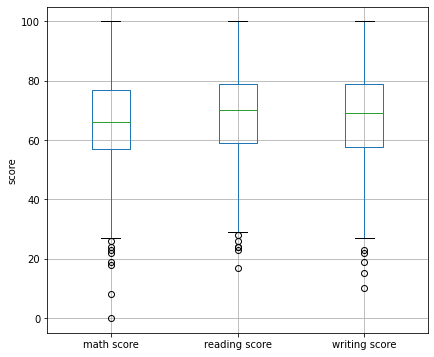

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.boxplot(column=['math score', 'reading score', 'writing score'])
fig.set_title('')
fig.set_ylabel('score')

In [10]:
data[(data['math score']<0) | (data['math score']>100)].size + data[(data['reading score']<0) | (data['reading score']>100)].size + data[(data['writing score']<0) | (data['writing score']>100)].size

0

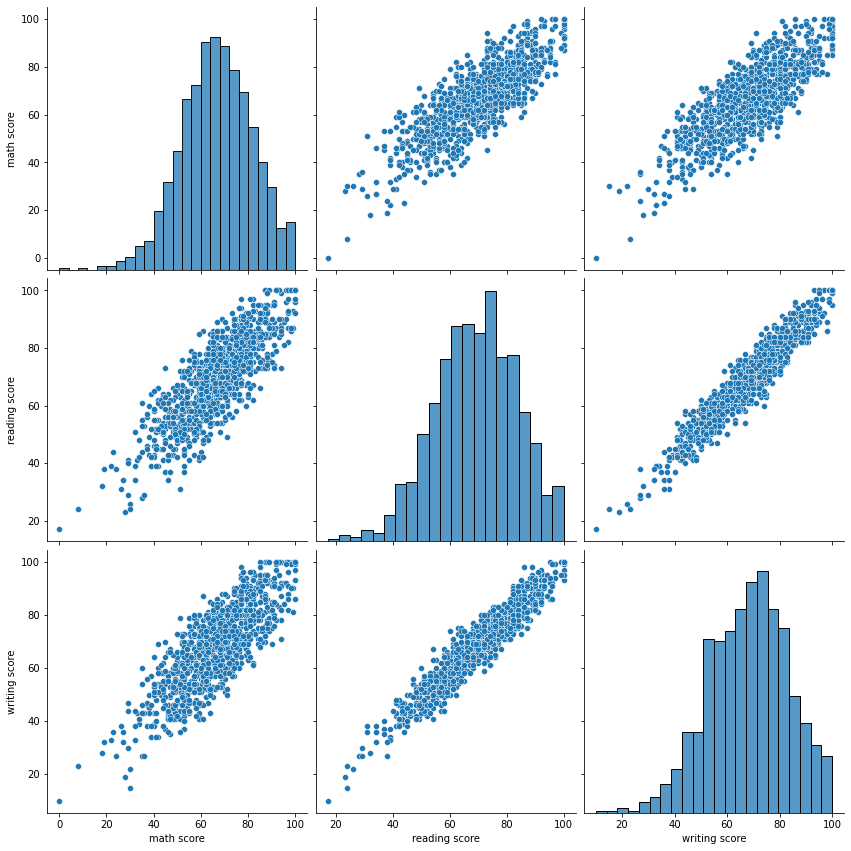

In [11]:
sns.pairplot(data[['math score', 'reading score', 'writing score']], height = 4)

In [12]:
gender=data.groupby(["gender"])["math score","reading score","writing score"].mean()
#gender=gender.to_frame()
gender=gender.reset_index()
gender

<ipython-input-12-b7527dfc6251>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gender=data.groupby(["gender"])["math score","reading score","writing score"].mean()


,gender,math score,reading score,writing score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


In [13]:
# lets check the number of unique items present in the categorical column

data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

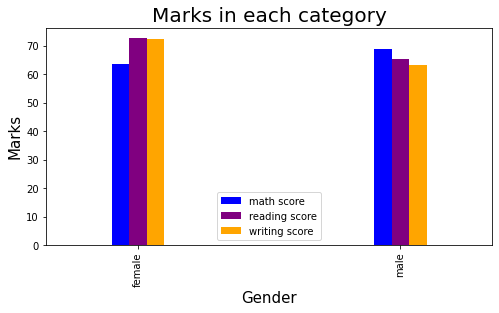

In [14]:
gender.plot(x="gender",y=["math score","reading score","writing score"],kind="bar",color=['blue','purple','orange'],figsize=(8,4),width=0.2)
plt.xlabel("Gender",size=15)
plt.ylabel("Marks",size=15)
plt.title("Marks in each category",size=20)
plt.show()

In [15]:
gender.to_csv("Gender.csv",index=False)

In [16]:
gender_race=data.groupby(["race/ethnicity"])["math score","reading score","writing score"].mean()
gender_race=gender_race.reset_index()

<ipython-input-16-c9e432fcee12>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gender_race=data.groupby(["race/ethnicity"])["math score","reading score","writing score"].mean()


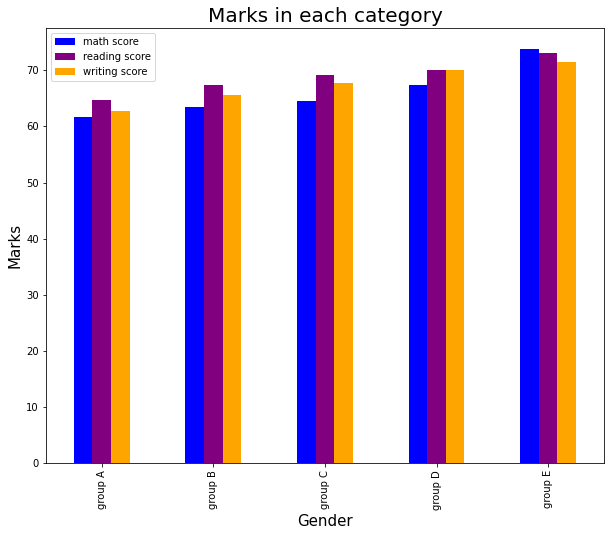

In [17]:
gender_race.plot(x="race/ethnicity",y=["math score","reading score","writing score"],kind="bar",color=['blue','purple','orange'],figsize=(10,8))
plt.xlabel("Gender",size=15)
plt.ylabel("Marks",size=15)
plt.title("Marks in each category",size=20)
plt.show()

In [18]:
race=data.groupby(["gender","race/ethnicity"])["math score","reading score","writing score"].mean()
race

<ipython-input-18-b86fe8163434>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  race=data.groupby(["gender","race/ethnicity"])["math score","reading score","writing score"].mean()


math score  reading score  writing score
gender race/ethnicity                                          
female group A          58.527778      69.000000      67.861111
       group B          61.403846      71.076923      70.048077
       group C          62.033333      71.944444      71.777778
       group D          65.248062      74.046512      75.023256
       group E          70.811594      75.840580      75.536232
male   group A          63.735849      61.735849      59.150943
       group B          65.930233      62.848837      60.220930
       group C          67.611511      65.424460      62.712230
       group D          69.413534      66.135338      65.413534
       group E          76.746479      70.295775      67.394366

In [19]:
race = race.reset_index()
race

,gender,race/ethnicity,math score,reading score,writing score
0,female,group A,58.527778,69.000000,67.861111
1,female,group B,61.403846,71.076923,70.048077
2,female,group C,62.033333,71.944444,71.777778
3,female,group D,65.248062,74.046512,75.023256
4,female,group E,70.811594,75.840580,75.536232
5,male,group A,63.735849,61.735849,59.150943
6,male,group B,65.930233,62.848837,60.220930
7,male,group C,67.611511,65.424460,62.712230
8,male,group D,69.413534,66.135338,65.413534
9,male,group E,76.746479,70.295775,67.394366


In [20]:
male = race[race['gender']=='male']
male

,gender,race/ethnicity,math score,reading score,writing score
5,male,group A,63.735849,61.735849,59.150943
6,male,group B,65.930233,62.848837,60.220930
7,male,group C,67.611511,65.424460,62.712230
8,male,group D,69.413534,66.135338,65.413534
9,male,group E,76.746479,70.295775,67.394366


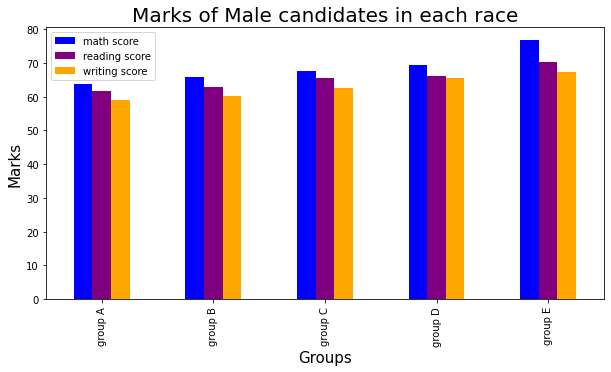

In [21]:
male.plot(x="race/ethnicity",y=["math score","reading score","writing score"],kind="bar",color=['blue','purple','orange'],figsize=(10,5))
plt.xlabel("Groups",size=15)
plt.ylabel("Marks",size=15)
plt.title("Marks of Male candidates in each race",size=20)
plt.legend()
plt.show()

In [22]:
female = race[race['gender']=='female']
female

,gender,race/ethnicity,math score,reading score,writing score
0,female,group A,58.527778,69.000000,67.861111
1,female,group B,61.403846,71.076923,70.048077
2,female,group C,62.033333,71.944444,71.777778
3,female,group D,65.248062,74.046512,75.023256
4,female,group E,70.811594,75.840580,75.536232


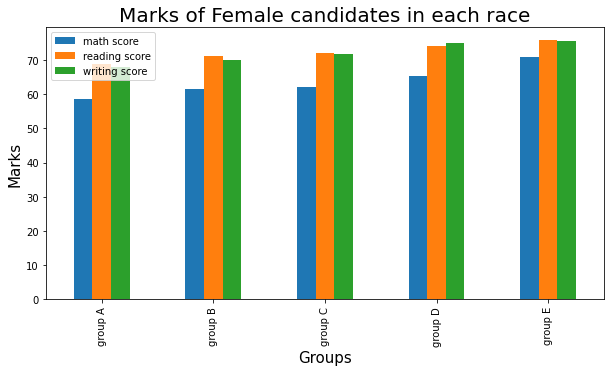

In [23]:
female.plot(x="race/ethnicity",y=["math score","reading score","writing score"],kind="bar",figsize=(10,5))
plt.xlabel("Groups",size=15)
plt.ylabel("Marks",size=15)
plt.title("Marks of Female candidates in each race",size=20)
plt.legend()
plt.show()

In [24]:
#Exporting all the files to csv
race.to_csv("raceethnicity.csv",index=False)
male.to_csv("male.csv",index=False)
female.to_csv("female.csv",index=False)

In [25]:
ple=data.groupby(["gender","parental level of education"]).count()
ple = ple.reset_index()
ple

,gender,parental level of education,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,female,associate's degree,116,116,116,116,116,116
1,female,bachelor's degree,63,63,63,63,63,63
2,female,high school,94,94,94,94,94,94
3,female,master's degree,36,36,36,36,36,36
4,female,some college,118,118,118,118,118,118
5,female,some high school,91,91,91,91,91,91
6,male,associate's degree,106,106,106,106,106,106
7,male,bachelor's degree,55,55,55,55,55,55
8,male,high school,102,102,102,102,102,102
9,male,master's degree,23,23,23,23,23,23


In [26]:
ple=ple[['gender','parental level of education','race/ethnicity']]
ple.rename(columns={"race/ethnicity":"count"},inplace=True)

C:\Users\User\Adira\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [27]:
maleple=ple[ple['gender']=='male']
femaleple=ple[ple['gender']=='female']

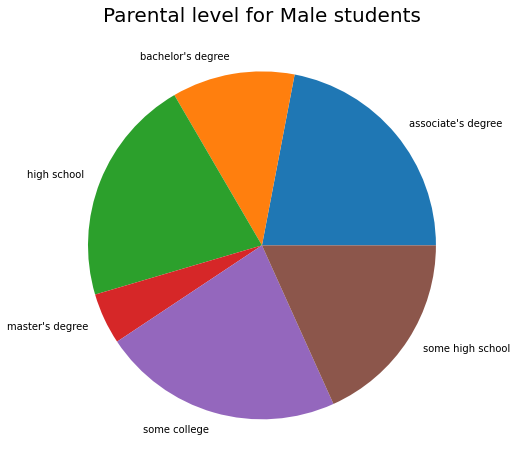

In [28]:
figure = plt.figure(figsize=(10,8))
plt.pie(maleple["count"],labels=maleple["parental level of education"])
plt.title("Parental level for Male students",size=20)
plt.show()

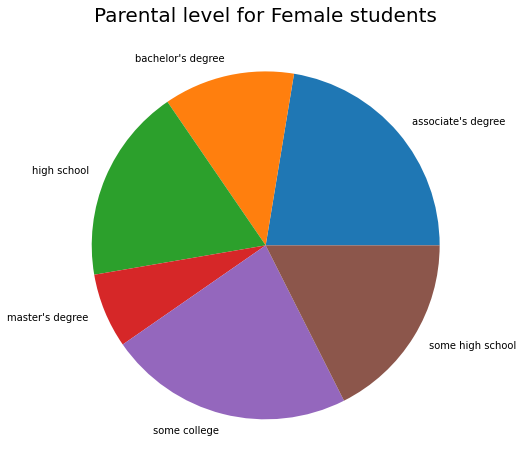

In [29]:
figure = plt.figure(figsize=(10,8))
plt.pie(femaleple["count"],labels=femaleple["parental level of education"])
plt.title("Parental level for Female students",size=20)
plt.show()

In [30]:
#Exporting to csv

maleple.to_csv("male parental.csv",index=False)
femaleple.to_csv("femal parental.csv",index=False)

In [31]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [32]:
lunch=data.groupby(['lunch']).count()
lunch.reset_index(inplace=True)
lunch

,lunch,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,free/reduced,355,355,355,355,355,355,355
1,standard,645,645,645,645,645,645,645


In [33]:
lunch = lunch[['lunch','gender']]
lunch.rename(columns={"gender":"count"},inplace=True)
lunch

C:\Users\User\Adira\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,lunch,count
0,free/reduced,355
1,standard,645


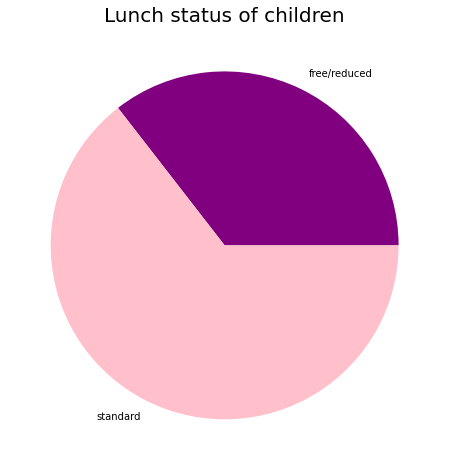

In [34]:
figure = plt.figure(figsize=(8,8))
plt.pie(lunch["count"],labels=lunch["lunch"],colors=["purple","pink"])
plt.title("Lunch status of children",size=20)
plt.show()

In [35]:
#Exporting it to csv
lunch.to_csv("Lunch.csv",index=False)

In [36]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [37]:
tpc=data['test preparation course'].value_counts()
tpc=tpc.to_frame()
tpc.reset_index(inplace=True)

In [38]:
tpc.rename(columns={"index":"test preparation course","test preparation course":"count"},inplace=True)
tpc

,test preparation course,count
0,none,642
1,completed,358


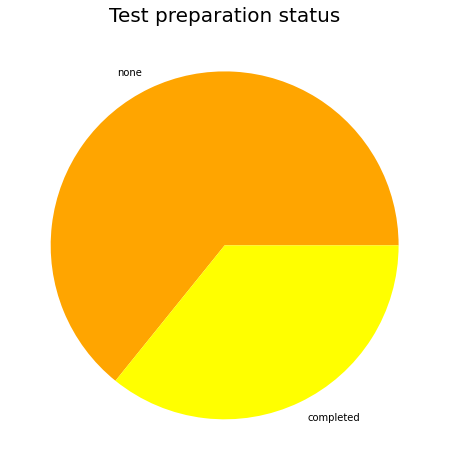

In [39]:
figure = plt.figure(figsize=(8,8))
plt.pie(tpc["count"],labels=tpc["test preparation course"],colors=["orange","yellow"])
plt.title("Test preparation status",size=20)
plt.show()

In [40]:
#Exporting it to csv
tpc.to_csv("test status.csv",index=False)